In [2]:
import pandas as pd
import numpy as np
from dist_analysis.distance import DistanceSim, kendall_tau

In [4]:
# Temporary data cleaning 
mn_data = pd.read_csv("data/MN2013_result.csv")
mn_data = mn_data.dropna()

mn_data = mn_data.replace(',', '')
mn_data['first'] = mn_data['first'].map(lambda a: a.replace(',', ''))
mn_data['second'] = mn_data['second'].map(lambda a: a.replace(',', ''))
mn_data['third'] = mn_data['third'].map(lambda a: a.replace(',', ''))


cand_first_votes = dict([(c, int(v)) for c, v in zip(mn_data['candidate'], mn_data['first'])])
cand_second_votes = dict([(c, int(v)) for c, v in zip(mn_data['candidate'], mn_data['second'])])
cand_third_votes = dict([(c, int(v)) for c, v in zip(mn_data['candidate'], mn_data['third'])])
cand_id = dict([(c, int(v)) for c, v in zip(mn_data['candidate'], range(1, len(mn_data)+1))])

irv = []

for i in mn_data['IRV order']:
  if i == 'Ma Anderson':
    irv.append('MARK V ANDERSON')
  elif i == 'Me Anderson':
    irv.append('MERRILL ANDERSON')
  else:
    for cand in mn_data['candidate']:
      if i.lower() in cand.lower().split():
        irv.append(cand)


mn_data['IRV order'] = list(map(lambda k: cand_id[k], irv))

/Users/jackgibson/Documents/mggg_summer23/rcv-distances/dist_analysis/distance.py:58: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


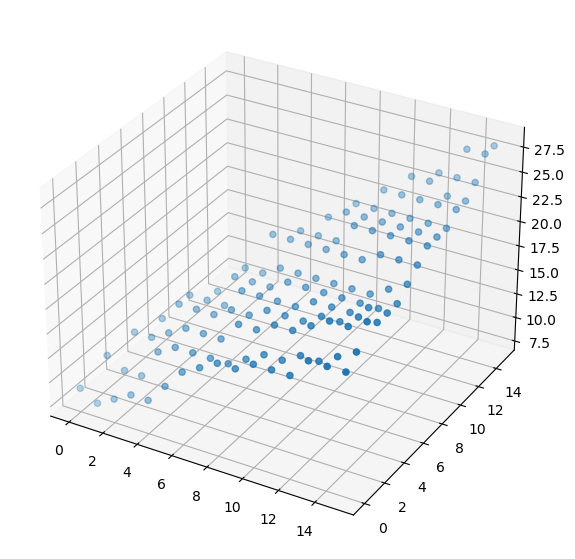

In [7]:
model = DistanceSim(mn_data, kendall_tau)

m = 15
model.calc_distances(m)
model.gen_3d_plot()